In [3]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("GlobalLandTemperaturesByCity.csv")
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [5]:
data.isna().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [7]:
data = data.dropna()

In [9]:
data.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

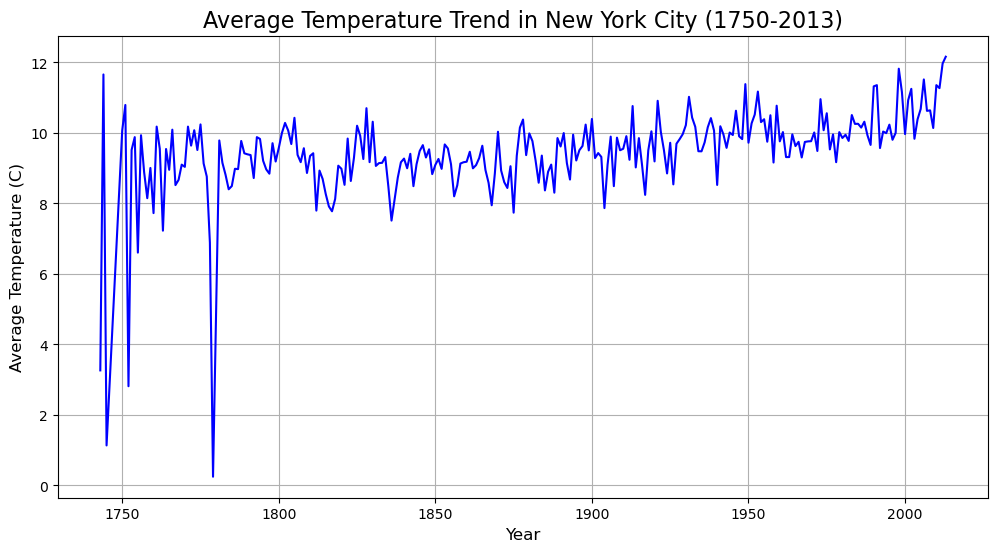

In [21]:
city_data = data[data['City'] == 'New York'].copy()
city_data['dt'] = pd.to_datetime(city_data['dt'], errors='coerce')
city_data['Year'] = city_data['dt'].dt.year
city_data['Year']
annual_avg_temp = city_data.groupby('Year')['AverageTemperature'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(annual_avg_temp['Year'], annual_avg_temp['AverageTemperature'], linestyle='-', color='blue')
plt.title('Average Temperature Trend in New York City (1750-2013)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (C)', fontsize=12)
plt.grid(True)
plt.show()

In [23]:
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E


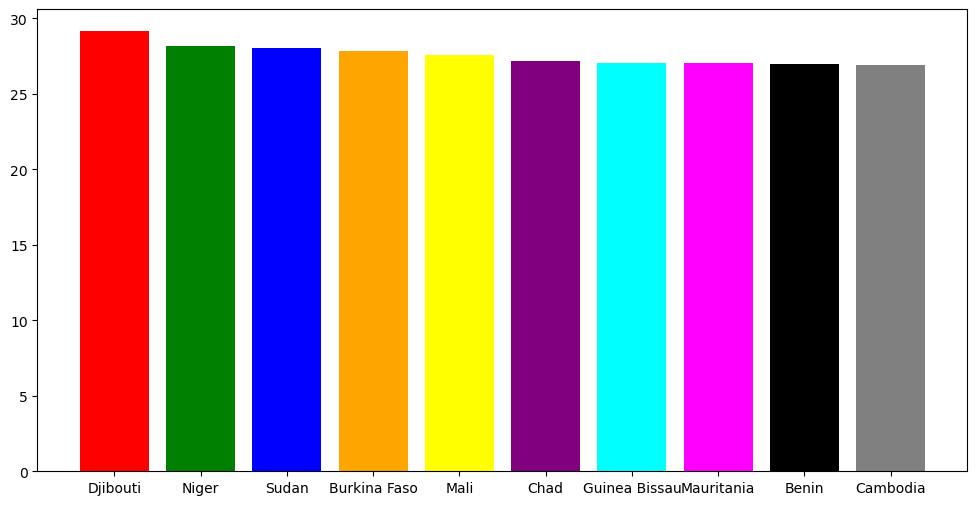

In [63]:
country_avg_temp = data.groupby('Country')['AverageTemperature'].mean().reset_index()
top_countries = country_avg_temp.sort_values(by='AverageTemperature',ascending=False).head(10)

#Bar Plot

plt.figure(figsize=(12,6))
plt.bar(top_countries['Country'],top_countries['AverageTemperature'],color = ['red', 'green', 'blue', 'orange', 'yellow', 
          'purple', 'cyan', 'magenta', 'black', 'gray'])
plt.show()



In [65]:
data.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E


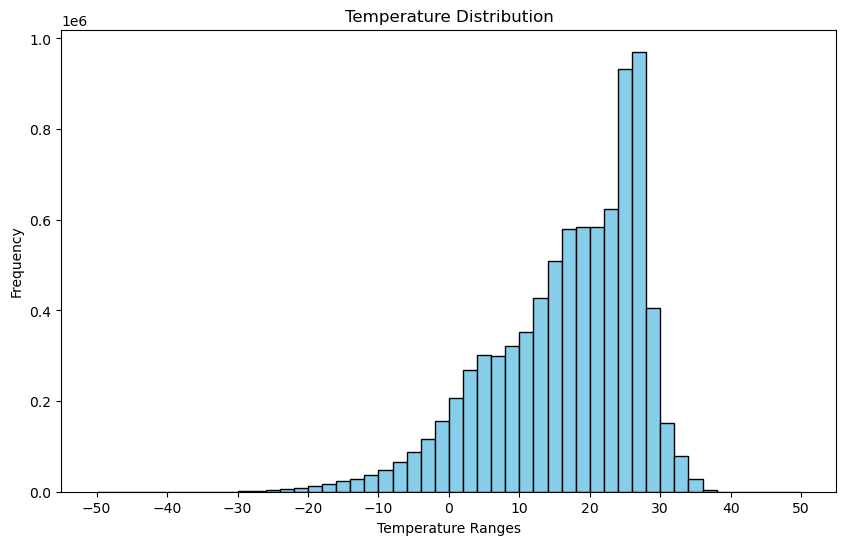

In [102]:
import numpy as np
avg_temperatures = data['AverageTemperature']
b = np.arange(-50, 51, 2)
plt.figure(figsize=(10,6))
#bins defines the intervals for grouping the data
plt.hist(avg_temperatures,bins = b,color="skyblue",edgecolor="black")
plt.grid(False) #Removing the grid boxes
plt.title("Temperature Distribution")
plt.xticks(range(-50,51,10))
plt.yticks()
plt.xlabel("Temperature Ranges")
plt.ylabel("Frequency")
plt.show()

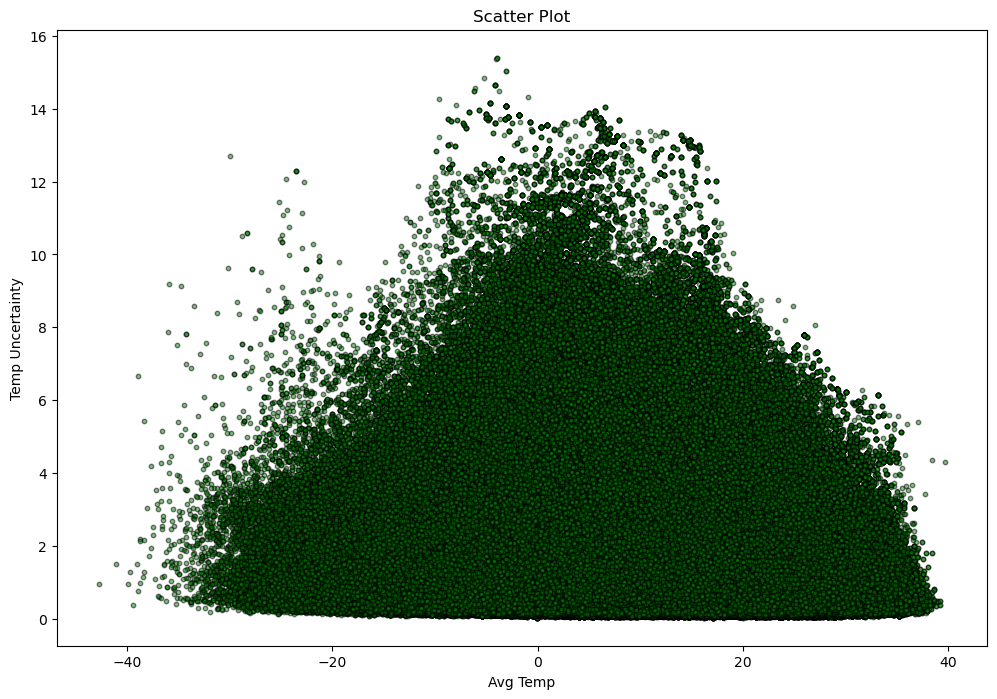

In [130]:
avg_temp = data['AverageTemperature']
temp_uncertainty = data['AverageTemperatureUncertainty']
plt.figure(figsize=(12,8))
plt.scatter(avg_temp,temp_uncertainty,color="green",s= 10, edgecolor="black",alpha = 0.5)
#plt.xticks(range(1,6,1))
#plt.yticks(range(10,60,10))
plt.title("Scatter Plot")
plt.xlabel("Avg Temp")
plt.ylabel("Temp Uncertainty")
plt.show()

In [132]:
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E


In [134]:
data['dt'] = pd.to_datetime(data['dt'],errors='coerce')

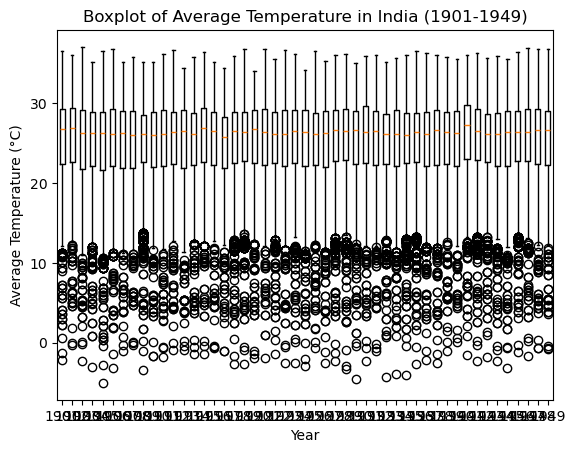

In [161]:
country_data = data[data['Country'] == 'India'].copy()
country_data['year'] = country_data['dt'].dt.year
country_data_within_period = country_data[(country_data['year'] > 1900) & (country_data['year'] < 1950)]
plt.boxplot([country_data_within_period[country_data_within_period['year'] == year]['AverageTemperature'] 
             for year in sorted(country_data_within_period['year'].unique())])

# Customize the plot
plt.title('Boxplot of Average Temperature in India (1901-1949)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.xticks(range(1, len(sorted(country_data_within_period['year'].unique())) + 1),
           sorted(country_data_within_period['year'].unique()))

# Show the plot
plt.show()